# Hometask 9

As a homework assignment, you are asked to create a neural network using Keras mechanisms that will classify products from the [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset.

You are to propose your own network architecture. The accuracy of the most naive but adequate neural network is approximately 91%. The accuracy of your model should be no lower than this. To achieve such values, you will need to experiment with network hyperparameters:

- number of layers;
- number of neurons;
- activation functions;
- number of epochs;
- the size of the batch.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

2023-08-08 12:55:25.749137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4938 - accuracy: 0.8279
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3374 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3113 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2927 - accuracy: 0.8926

MODEL EVALUATION:
313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8758


#### In the model above, the accuracy is about 89% on training and 87% on validation. Let's do it better with the concept of Convolutional Neural Networks

In [4]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

#### It's likely gone up to about 92% on the training data and 90% on the validation data. 

In [5]:
history = model.fit(
    training_images,
    training_labels,
    epochs=60,
    batch_size=512,
    validation_split = 0.1
)

Epoch 1/60
106/106 [==============================] - 13s 121ms/step - loss: 0.1708 - accuracy: 0.9380 - val_loss: 0.1659 - val_accuracy: 0.9368
Epoch 2/60
106/106 [==============================] - 13s 124ms/step - loss: 0.1592 - accuracy: 0.9422 - val_loss: 0.1633 - val_accuracy: 0.9407
Epoch 3/60
106/106 [==============================] - 12s 115ms/step - loss: 0.1550 - accuracy: 0.9439 - val_loss: 0.1617 - val_accuracy: 0.9412
Epoch 4/60
106/106 [==============================] - 13s 121ms/step - loss: 0.1512 - accuracy: 0.9456 - val_loss: 0.1651 - val_accuracy: 0.9392
Epoch 5/60
106/106 [==============================] - 13s 123ms/step - loss: 0.1484 - accuracy: 0.9468 - val_loss: 0.1635 - val_accuracy: 0.9412
Epoch 6/60
106/106 [==============================] - 12s 118ms/step - loss: 0.1441 - accuracy: 0.9482 - val_loss: 0.1603 - val_accuracy: 0.9420
Epoch 7/60
106/106 [==============================] - 13s 120ms/step - loss: 0.1413 - accuracy: 0.9496 - val_loss: 0.1636 - val_ac

106/106 [==============================] - 31s 295ms/step - loss: 0.0077 - accuracy: 0.9989 - val_loss: 0.3811 - val_accuracy: 0.9273
Epoch 58/60
106/106 [==============================] - 28s 262ms/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 0.3807 - val_accuracy: 0.9308
Epoch 59/60
106/106 [==============================] - 27s 258ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.3925 - val_accuracy: 0.9277
Epoch 60/60
106/106 [==============================] - 28s 260ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.4070 - val_accuracy: 0.9235


In [6]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 2s 6ms/step - loss: 0.5918 - accuracy: 0.9089
[0.5917938351631165, 0.9089000225067139]


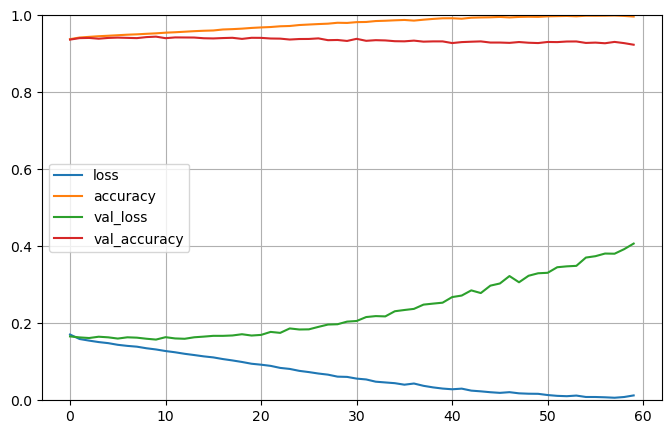

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 1s 3ms/step


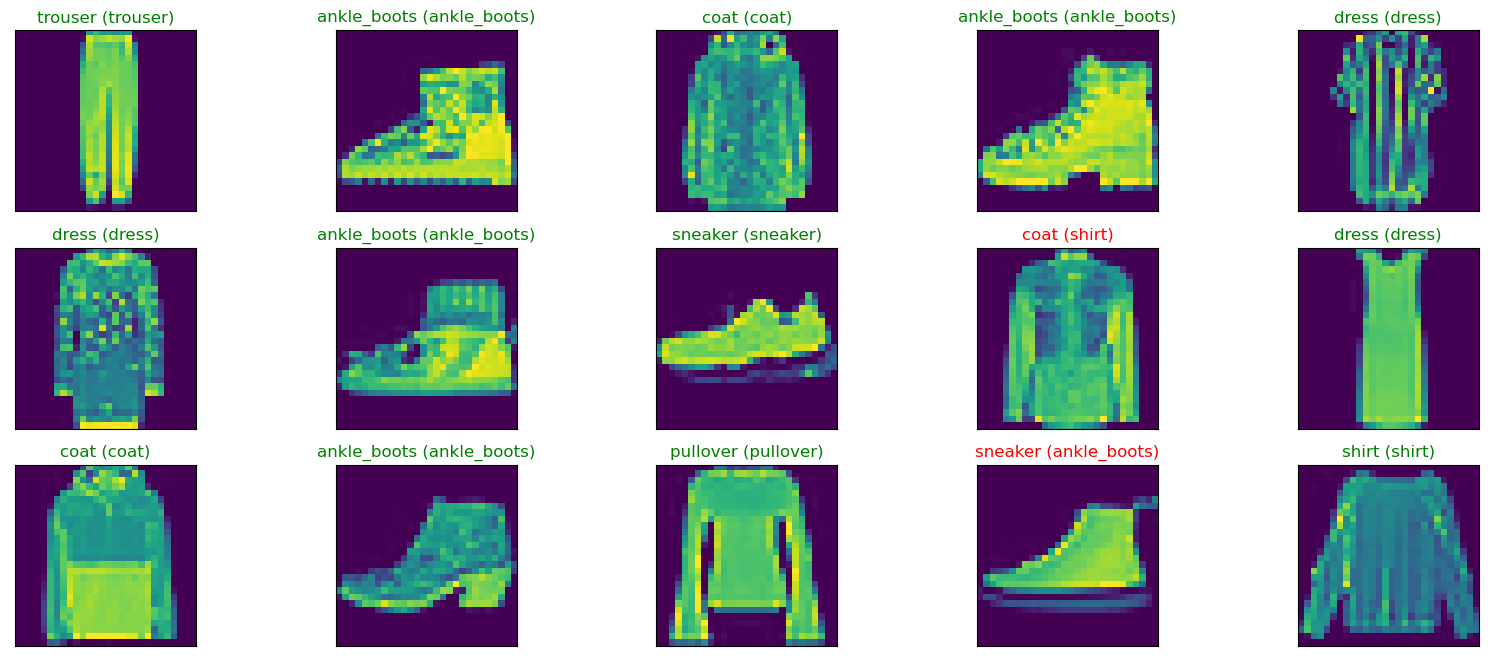

In [14]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
predictions = model.predict(test_images)
test_images = test_images.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(predictions[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#### Conclusion:
The neural network was built after selecting parameters for up to 60 epochs: it gives an accuracy of 90,9% on test data.